In [1]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [4]:
new = pd.read_excel(r"C:\Users\omc\Desktop\Python\Machine Learning\Linear Aggression\AirPollution.xls")
new

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM10    151 non-null    float64       
 1   Pb      151 non-null    float64       
 2   Cd      151 non-null    float64       
 3   Cu      151 non-null    float64       
 4   Cr      151 non-null    float64       
 5   Zn      151 non-null    int64         
 6   NOx     151 non-null    float64       
 7   SO2     151 non-null    float64       
 8   Site    151 non-null    object        
 9   Date    151 non-null    datetime64[ns]
 10  Season  151 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 13.1+ KB


In [6]:
new.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


<AxesSubplot:>

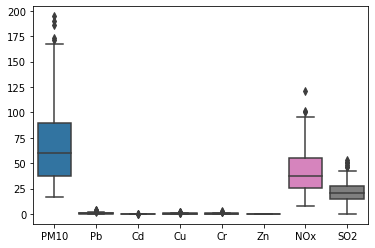

In [7]:
sns.boxplot(data=new)

In [ ]:
for columns in new:
    if columns > outliers, replace by quantile (0.75), columns:
        columns < outliers, replace by quantile (0.25), columns:
    else:
        columns(i):
print(columns)

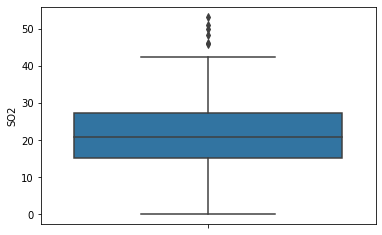

In [43]:
ax = sns.boxplot(y=new["SO2"])

In [15]:
q1 = new['PM10'].quantile(0.25)
q3 = new['PM10'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

169.0425

In [16]:
new['PM10']=np.where(new['PM10'] > upper_limit,upper_limit,new['PM10'])

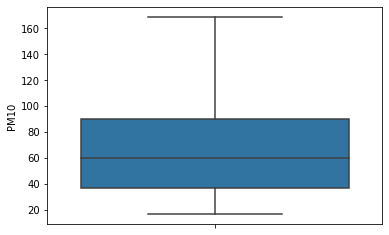

In [17]:
ax = sns.boxplot(y=new["PM10"])

In [19]:
q1 = new['Pb'].quantile(0.25)
q3 = new['Pb'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.0825

In [20]:
new['Pb']=np.where(new['Pb'] > upper_limit,upper_limit,new['Pb'])

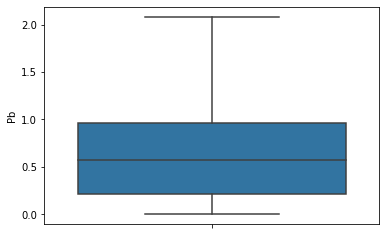

In [21]:
ax = sns.boxplot(y=new["Pb"])

In [22]:
q1 = new['Cd'].quantile(0.25)
q3 = new['Cd'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

In [24]:
new['Cd']=np.where(new['Cd'] > upper_limit,upper_limit,new['Cd'])

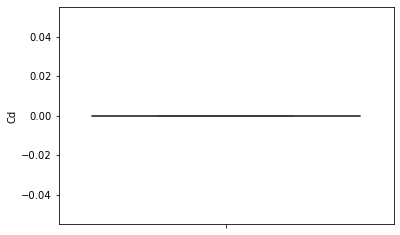

In [25]:
ax = sns.boxplot(y=new["Cd"])

In [27]:
q1 = new['Cu'].quantile(0.25)
q3 = new['Cu'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.2775

In [28]:
new['Cu']=np.where(new['Cu'] > upper_limit,upper_limit,new['Cu'])

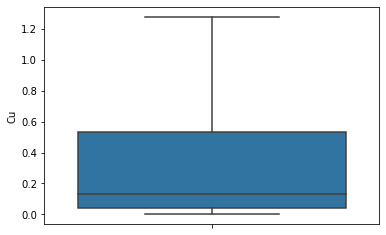

In [29]:
ax = sns.boxplot(y=new["Cu"])

In [31]:
q1 = new['Cr'].quantile(0.25)
q3 = new['Cr'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.3224999999999998

In [41]:
new['Cr']=np.where(new['Cr'] > upper_limit,upper_limit,new['Cr'])

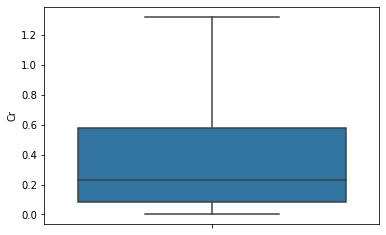

In [42]:
ax = sns.boxplot(y=new["Cr"])

In [36]:
q1 = new['NOx'].quantile(0.25)
q3 = new['NOx'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

98.13499999999999

In [39]:
new['NOx']=np.where(new['NOx'] > upper_limit,upper_limit,new['NOx'])

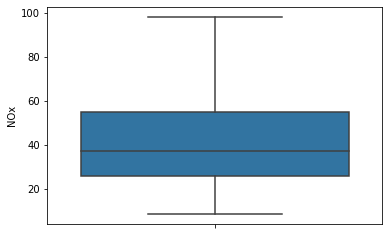

In [40]:
ax = sns.boxplot(y=new["NOx"])

In [44]:
q1 = new['SO2'].quantile(0.25)
q3 = new['SO2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

45.80250000000001

In [45]:
new['SO2']=np.where(new['SO2'] > upper_limit,upper_limit,new['SO2'])

<AxesSubplot:>

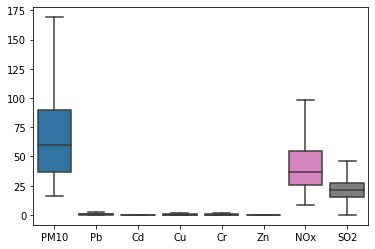

In [46]:
sns.boxplot(data=new)

In [47]:
new.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.00000,151.000000,151.0,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.06856,0.679983,0.0,0.327053,0.372848,0.0,42.501755,22.226656
std,39.61346,0.560941,0.0,0.395327,0.361985,0.0,22.551657,10.049931
min,16.24000,0.000000,0.0,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.00500,0.220000,0.0,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.61000,0.570000,0.0,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.82000,0.965000,0.0,0.535000,0.580000,0.0,54.695000,27.420000
max,169.04250,2.082500,0.0,1.277500,1.322500,0.0,98.135000,45.802500


In [48]:
new.isna().sum()  # no missing data

PM10      0
Pb        0
Cd        0
Cu        0
Cr        0
Zn        0
NOx       0
SO2       0
Site      0
Date      0
Season    0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [49]:
new.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.0825,0.0,0.53,0.6100,0,84.17,40.3700,Mandai,2004-02-07,Summer
1,140.25,2.0825,0.0,0.10,0.9100,0,88.81,39.4800,Mandai,2004-02-14,Summer
2,107.01,1.3100,0.0,0.19,0.4800,0,81.49,45.8025,Mandai,2004-02-21,Summer
3,88.81,0.7600,0.0,0.33,0.3900,0,61.80,27.4200,Mandai,2004-02-28,Summer
4,75.05,0.6000,0.0,0.41,1.3225,0,48.71,19.2300,Mandai,2004-03-06,Summer


In [50]:
# Putting feature variable to X
X = new.drop('PM10', axis= 1)

# Putting response variable to y
y = new[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=100)

In [51]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
25,71.45,0.61,0.0,0.59,0.49,0,36.48,22.56,SNDT,2004-03-29,Summer
21,95.38,0.99,0.0,0.84,0.73,0,95.96,26.30,SNDT,2004-03-01,Summer
92,74.84,0.69,0.0,0.08,0.49,0,40.21,26.06,Bhosari,2004-11-12,Winter
9,56.80,0.78,0.0,0.07,0.20,0,23.41,14.09,Mandai,2004-04-10,Summer
23,65.89,0.84,0.0,0.74,0.49,0,56.02,24.24,SNDT,2004-03-15,Summer


In [52]:
df.corr()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
PM10,1.000000,0.850187,NaN,0.760802,0.814891,NaN,0.658139,0.645023
Pb,0.850187,1.000000,NaN,0.711570,0.738218,NaN,0.723576,0.673720
Cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cu,0.760802,0.711570,NaN,1.000000,0.793154,NaN,0.588185,0.560835
Cr,0.814891,0.738218,NaN,0.793154,1.000000,NaN,0.553527,0.558779
Zn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOx,0.658139,0.723576,NaN,0.588185,0.553527,NaN,1.000000,0.839704
SO2,0.645023,0.673720,NaN,0.560835,0.558779,NaN,0.839704,1.000000


<AxesSubplot:>

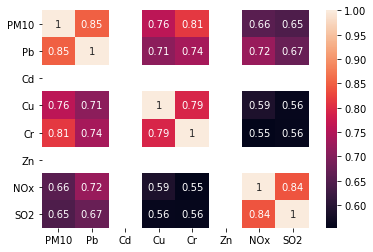

In [53]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'Season vs PM10'}, xlabel='PM10', ylabel='Season'>

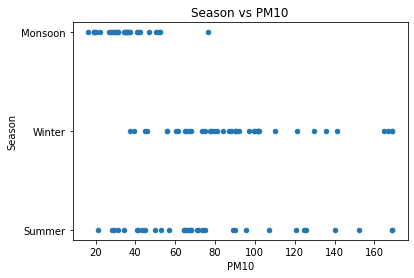

In [54]:
df.plot.scatter(x='PM10', y='Season', title='Season vs PM10')